In [2]:
import pandas as pd 
df= pd.read_excel("processed.xlsx")
df

,invoiceid,date,region,state,city,distributor,hospital,drugname,drugcategory,salesrep,unitssold,unitprice,totalsales,paymenttype
0,INV001_X0,2024-05-10,North,West Bengal,Kolkata,MedSupply Pvt Ltd,Ruby Hospital,Paracetamol,Analgesic,Amit Verma,249,5.72,1424.28,Credit
1,INV002_X0,2024-06-06,West,Gujarat,Ahmedabad,MedSupply Pvt Ltd,Zydus Hospital,Atorvastatin,Cardiac,Priya Mehta,379,23.31,8834.49,Cash
2,INV003_X0,2024-06-20,South,Maharashtra,Mumbai,MedSupply Pvt Ltd,Fortis Hospital,Metformin,Antidiabetic,Ravi Kumar,120,13.74,1648.80,Cash
3,INV004_X0,2024-08-15,West,West Bengal,Kolkata,MedSupply Pvt Ltd,Ruby Hospital,Atorvastatin,Cardiac,Priya Mehta,194,22.02,4271.88,Credit
4,INV005_X0,2024-08-02,East,Maharashtra,Mumbai,MedSupply Pvt Ltd,Fortis Hospital,Azithromycin,Antibiotic,Rahul Das,85,30.18,2565.30,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,INV096_X29,2024-12-16,East,Maharashtra,Mumbai,MedSupply Pvt Ltd,Fortis Hospital,Metformin,Antidiabetic,Rahul Das,163,13.94,2272.22,Credit
2996,INV097_X29,2025-02-27,East,Tamil Nadu,Chennai,MedSupply Pvt Ltd,Global Hospital,Amoxicillin,Antibiotic,Rahul Das,158,21.53,3401.74,Cash
2997,INV098_X29,2025-01-18,South,Karnataka,Mysuru,MedSupply Pvt Ltd,Narayana Hospital,Losartan,Cardiac,Ravi Kumar,383,23.12,8854.96,Credit
2998,INV099_X29,2025-03-09,North,Tamil Nadu,Chennai,MedSupply Pvt Ltd,Global Hospital,Insulin,Antidiabetic,Amit Verma,286,50.23,14365.78,Cash


In [4]:
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()
df['quarter'] = df['date'].dt.to_period('Q').astype(str)

## Created year, month, and quarter features to analyze seasonality and time-based trends

In [23]:
#Month-over-Month (MoM) Revenue Change -By Region
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')

monthly_region_sales = (
    df.groupby(['region', 'month'])['totalsales']
      .sum()
      .reset_index()
)

monthly_region_sales['region_mom_growth_pct'] = (
    monthly_region_sales
    .groupby('region')['totalsales']
    .pct_change() * 100
)

df = df.merge(
    monthly_region_sales[['region', 'month', 'region_mom_growth_pct']],
    on=['region', 'month'],
    how='left'
)
print(df)

       invoiceid       date region          state       city  \
0      INV001_X0 2024-05-10  North    West Bengal    Kolkata   
1      INV002_X0 2024-06-06   West        Gujarat  Ahmedabad   
2      INV003_X0 2024-06-20  South    Maharashtra     Mumbai   
3      INV004_X0 2024-08-15   West    West Bengal    Kolkata   
4      INV005_X0 2024-08-02   East    Maharashtra     Mumbai   
...          ...        ...    ...            ...        ...   
2995  INV096_X29 2024-12-16   East    Maharashtra     Mumbai   
2996  INV097_X29 2025-02-27   East     Tamil Nadu    Chennai   
2997  INV098_X29 2025-01-18  South      Karnataka     Mysuru   
2998  INV099_X29 2025-03-09  North     Tamil Nadu    Chennai   
2999  INV100_X29 2024-12-30  South  Uttar Pradesh    Lucknow   

            distributor           hospital      drugname  drugcategory  \
0     MedSupply Pvt Ltd      Ruby Hospital   Paracetamol     Analgesic   
1     MedSupply Pvt Ltd     Zydus Hospital  Atorvastatin       Cardiac   
2     Med

## Sales-based Features

In [11]:

import numpy as np 
df['log_sales'] = df['totalsales'].apply(lambda x: 0 if x <= 0 else np.log(x))
print(df['log_sales'])
log_sales = df['log_sales']
print(log_sales)

0       7.261422
1       9.086419
2       7.407803
3       8.359809
4       7.849831
          ...   
2995    7.728513
2996    8.132042
2997    9.088733
2998    9.572604
2999    7.661245
Name: log_sales, Length: 3000, dtype: float64
0       7.261422
1       9.086419
2       7.407803
3       8.359809
4       7.849831
          ...   
2995    7.728513
2996    8.132042
2997    9.088733
2998    9.572604
2999    7.661245
Name: log_sales, Length: 3000, dtype: float64


## Aggregated Features

In [12]:
#Region-level sales contribution

region_avg_sales = df.groupby('region')['totalsales'].mean()
df['region_avg_sales'] = df['region'].map(region_avg_sales)
region_avg_sales = df['region_avg_sales']
print(region_avg_sales)

0       3763.580351
1       3087.417600
2       4096.068143
3       3087.417600
4       4602.525420
           ...     
2995    4602.525420
2996    4602.525420
2997    4096.068143
2998    3763.580351
2999    4096.068143
Name: region_avg_sales, Length: 3000, dtype: float64


In [13]:
#Product popularity

drug_sales_count = df['drugname'].value_counts()
df['drug_popularity'] = df['drugname'].map(drug_sales_count)
drug_popularity= df['drug_popularity']
print(drug_popularity)


0       270
1       570
2       480
3       570
4       210
       ... 
2995    480
2996    450
2997    390
2998    360
2999    270
Name: drug_popularity, Length: 3000, dtype: int64


## Categorical Encoding

In [ ]:
## Encoded categorical variables to numerical format for downstream analysis and modeling.

In [17]:
#Label Encoding
#Label Encoding
df['region_code'] = df['region'].astype('category').cat.codes  
df['product_code'] = df['drugname'].astype('category').cat.codes  
region_code = df['region_code']
product_code = df['product_code']
print(region_code)
print(product_code)

0       1
1       3
2       2
3       3
4       0
       ..
2995    0
2996    0
2997    2
2998    1
2999    2
Name: region_code, Length: 3000, dtype: int8
0       7
1       1
2       6
3       1
4       2
       ..
2995    6
2996    0
2997    5
2998    4
2999    3
Name: product_code, Length: 3000, dtype: int8


In [21]:
#High / Medium / Low Revenue Products
product_revenue = df.groupby('drugname')['totalsales'].sum()
df['product_revenue_category'] = pd.qcut(
    df['drugname'].map(product_revenue),
    q=3,
    labels=['Low Revenue', 'Medium Revenue', 'High Revenue']
)
product_revenue_category=df['product_revenue_category']
print(product_revenue_category)

0          Low Revenue
1         High Revenue
2          Low Revenue
3         High Revenue
4          Low Revenue
             ...      
2995       Low Revenue
2996    Medium Revenue
2997    Medium Revenue
2998      High Revenue
2999       Low Revenue
Name: product_revenue_category, Length: 3000, dtype: category
Categories (3, object): ['Low Revenue' < 'Medium Revenue' < 'High Revenue']


In [30]:
#Risk Flag Feature Engineering
region_product_sales = (
    df.groupby(['region', 'drugname'])['totalsales']
      .sum()
      .reset_index()
)

region_total_sales = (
    df.groupby('region')['totalsales']
      .sum()
      .reset_index()
      .rename(columns={'totalsales': 'region_total_sales'})  # Changed 'sales' to 'totalsales'
)

region_product_sales = region_product_sales.merge(
    region_total_sales, on='region'
)

region_product_sales['product_revenue_share'] = (
    region_product_sales['totalsales'] / region_product_sales['region_total_sales']
)

print(region_product_sales)


dependency_flag = (
    region_product_sales
    .groupby('region')['product_revenue_share']
    .max()
    .reset_index()
)

dependency_flag['single_product_dependency'] = np.where(
    dependency_flag['product_revenue_share'] > 0.5,
    'Yes',
    'No'
)

df = df.merge(
    dependency_flag[['region', 'single_product_dependency']],
    on='region',
    how='left'
)
print(df)

   region      drugname  totalsales  region_total_sales  product_revenue_share
0    East   Amoxicillin   577664.50          3175742.54               0.181899
1    East  Atorvastatin   338301.40          3175742.54               0.106527
2    East  Azithromycin   169105.76          3175742.54               0.053249
3    East     Ibuprofen    62037.70          3175742.54               0.019535
4    East       Insulin  1636809.69          3175742.54               0.515410
5    East      Losartan   178729.73          3175742.54               0.056280
6    East     Metformin   166702.00          3175742.54               0.052492
7    East   Paracetamol    46391.76          3175742.54               0.014608
8   North   Amoxicillin   112620.51          2145240.80               0.052498
9   North  Atorvastatin   390173.40          2145240.80               0.181879
10  North  Azithromycin   180764.50          2145240.80               0.084263
11  North     Ibuprofen    83699.41          2145240

In [40]:
region_encoding = df['region'].value_counts()
df['region_encoded'] = df['region'].map(region_encoding)
df['efficiency_score'] = df['totalsales'] / df['unitssold']
feature_corr = (
    df[['totalsales', 'unitssold', 'unitprice', 'efficiency_score', 'region_encoded']]
    .corr()
    .round(2)
)

feature_corr



,totalsales,unitssold,unitprice,efficiency_score,region_encoded
totalsales,1.00,0.58,0.78,0.78,-0.09
unitssold,0.58,1.00,0.05,0.05,-0.08
unitprice,0.78,0.05,1.00,1.00,-0.05
efficiency_score,0.78,0.05,1.00,1.00,-0.05
region_encoded,-0.09,-0.08,-0.05,-0.05,1.00


In [39]:
revenue_corr = (
    feature_corr['totalsales']
    .drop('totalsales')
    .sort_values(ascending=False)
)

revenue_corr


unitprice           0.78
efficiency_score    0.78
unitssold           0.58
region_encoded     -0.09
Name: totalsales, dtype: float64

<Axes: title={'center': 'Feature Correlation with Revenue'}>

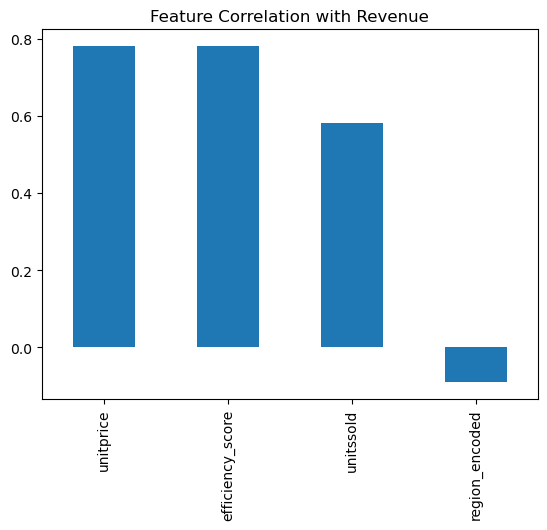

In [41]:
revenue_corr.plot(kind='bar', title='Feature Correlation with Revenue')

## Save Feature-Engineered Dataset

In [31]:
import os

os.makedirs("../data/notebooks", exist_ok=True)

df.to_excel("../data/notebooks/pharma_sales_features.xlsx", index=False)